# Contents
### 01. Importing libraries and data
### 02. Subsetting, wrangling, and cleaning time-series data
### 03. Line Charts of Data
### 04. Time-series analysis: decomposition
### 05. Testing for stationarity

# 01. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 
quandl.ApiConfig.api_key = 'PZJh9GBAmAbxrxcFeMFm'

In [3]:
# create path to import data
path = r'/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project'

In [4]:
# import COVID deaths data
df_covid_deaths = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','COVID_deaths_month+year.csv'), index_col = False)

In [5]:
# check output of dataframe
df_covid_deaths.head()

,Month + Year,State,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,01-2020,Alabama,All Ages,4,4729,282,0,35,318
1,01-2020,Alabama,Under 1 year,0,31,0,0,0,0
2,01-2020,Alabama,1-4 years,0,12,4,0,0,4
3,01-2020,Alabama,5-14 years,0,16,4,0,0,4
4,01-2020,Alabama,15-24 years,0,56,0,0,4,4


In [6]:
# check shape of dataframe
df_covid_deaths.shape

(26832, 9)

In [7]:
# check columns of dataframe
df_covid_deaths.columns

Index(['Month + Year', 'State', 'Age Group', 'COVID-19 Deaths', 'Total Deaths',
       'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths'],
      dtype='object')

# 02. Subsetting, wrangling, and cleaning time-series data

In [8]:
# filter for only "All Ages" in the "Age Group column"
df_all_ages = df_covid_deaths[df_covid_deaths['Age Group'] == 'All Ages']

In [9]:
df_all_ages.head()

,Month + Year,State,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,01-2020,Alabama,All Ages,4,4729,282,0,35,318
12,02-2020,Alabama,All Ages,4,4627,276,0,39,316
24,03-2020,Alabama,All Ages,48,4756,287,10,33,357
36,04-2020,Alabama,All Ages,339,4877,352,97,10,603
48,05-2020,Alabama,All Ages,430,5108,399,132,4,699


In [10]:
# remove "Age Group" column
df_all_ages = df_all_ages.drop(columns = 'Age Group')

In [11]:
df_all_ages.head()

,Month + Year,State,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,01-2020,Alabama,4,4729,282,0,35,318
12,02-2020,Alabama,4,4627,276,0,39,316
24,03-2020,Alabama,48,4756,287,10,33,357
36,04-2020,Alabama,339,4877,352,97,10,603
48,05-2020,Alabama,430,5108,399,132,4,699


### We found in previous geographical analysis that the states California, Texas, Florida and New York have the most COVID-19 deaths, so we will create subsets for each of these states to see their time series analysis individually. We will also create a subset that includes all states.

## Texas Subset

In [12]:
# create subset for only Texas, filter for Texas
df_texas_covid = df_all_ages[df_all_ages['State'] == 'Texas']

In [13]:
df_texas_covid.head()

,Month + Year,State,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
22188,01-2020,Texas,0,19050,1412,0,184,1596
22200,02-2020,Texas,4,17629,1202,0,160,1363
22212,03-2020,Texas,99,18576,1412,32,116,1593
22224,04-2020,Texas,934,18572,1660,392,24,2226
22236,05-2020,Texas,964,18731,1560,449,13,2087


In [14]:
# drop "State" column now that it is filtered for only Texas, as well as other unnecessary columns like "Total Deaths", "Pneumonia Deaths", "Pneumonia and COVID-19 Deaths", "Influenza Deaths", "Pneumonia, Influenza, or COVID-19 Deaths"
df_texas_covid = df_texas_covid.drop(columns=['State','Total Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths'])

In [15]:
df_texas_covid.head()

,Month + Year,COVID-19 Deaths
22188,01-2020,0
22200,02-2020,4
22212,03-2020,99
22224,04-2020,934
22236,05-2020,964


In [16]:
# reset index so we can use "Month + Year" column as a filter
df_texas_covid.reset_index(drop=True, inplace=True)

In [17]:
df_texas_covid.head()

,Month + Year,COVID-19 Deaths
0,01-2020,0
1,02-2020,4
2,03-2020,99
3,04-2020,934
4,05-2020,964


In [18]:
# check datatype of "Month + Year" column
data_types = df_texas_covid.dtypes
print(data_types)

Month + Year       object
COVID-19 Deaths     int64
dtype: object


In [19]:
# change the data type of the 'Month + Year' column to a Date
df_texas_covid['Month + Year'] = pd.to_datetime(df_texas_covid['Month + Year'])

In [20]:
# check datatype of "Month + Year" column
data_types_2 = df_texas_covid.dtypes
print(data_types_2)

Month + Year       datetime64[ns]
COVID-19 Deaths             int64
dtype: object


In [21]:
df_texas_covid.head()

,Month + Year,COVID-19 Deaths
0,2020-01-01,0
1,2020-02-01,4
2,2020-03-01,99
3,2020-04-01,934
4,2020-05-01,964


## California Subset

In [22]:
# create subset for only California, filter for California
df_cali_covid = df_all_ages[df_all_ages['State'] == 'California']

In [23]:
df_cali_covid.head()

,Month + Year,State,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
2064,01-2020,California,4,25756,2028,4,274,2302
2076,02-2020,California,4,23824,1845,0,296,2143
2088,03-2020,California,279,25119,2241,149,189,2560
2100,04-2020,California,2021,25617,2907,1156,31,3803
2112,05-2020,California,2238,24935,2578,1222,4,3599


In [24]:
# drop "State" column now that it is filtered for only California, as well as other unnecessary columns like "Total Deaths", "Pneumonia Deaths", "Pneumonia and COVID-19 Deaths", "Influenza Deaths", "Pneumonia, Influenza, or COVID-19 Deaths"
df_cali_covid = df_cali_covid.drop(columns=['State','Total Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths'])

In [25]:
df_cali_covid.head()

,Month + Year,COVID-19 Deaths
2064,01-2020,4
2076,02-2020,4
2088,03-2020,279
2100,04-2020,2021
2112,05-2020,2238


In [26]:
# reset index so we can use "Month + Year" column as a filter
df_cali_covid.reset_index(drop=True, inplace=True)

In [27]:
df_cali_covid.head()

,Month + Year,COVID-19 Deaths
0,01-2020,4
1,02-2020,4
2,03-2020,279
3,04-2020,2021
4,05-2020,2238


In [28]:
# check datatype of "Month + Year" column
data_types_3 = df_cali_covid.dtypes
print(data_types_3)

Month + Year       object
COVID-19 Deaths     int64
dtype: object


In [29]:
# change the data type of the 'Month + Year' column to a Date
df_cali_covid['Month + Year'] = pd.to_datetime(df_cali_covid['Month + Year'])

In [30]:
# check datatype of "Month + Year" column
data_types_4 = df_cali_covid.dtypes
print(data_types_4)

Month + Year       datetime64[ns]
COVID-19 Deaths             int64
dtype: object


## Florida Subset

In [31]:
# create subset for only Florida, filter for Florida
df_florida_covid = df_all_ages[df_all_ages['State'] == 'Florida']

In [32]:
df_florida_covid.head()

,Month + Year,State,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
4644,01-2020,Florida,0,19486,1134,0,150,1284
4656,02-2020,Florida,0,18207,1140,0,130,1270
4668,03-2020,Florida,191,19683,1514,106,101,1699
4680,04-2020,Florida,1311,19210,1908,691,31,2554
4692,05-2020,Florida,1131,19097,1585,571,14,2156


In [33]:
# drop "State" column now that it is filtered for only Florida, as well as other unnecessary columns like "Total Deaths", "Pneumonia Deaths", "Pneumonia and COVID-19 Deaths", "Influenza Deaths", "Pneumonia, Influenza, or COVID-19 Deaths"
df_florida_covid = df_florida_covid.drop(columns=['State','Total Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths'])

In [34]:
df_florida_covid.head()

,Month + Year,COVID-19 Deaths
4644,01-2020,0
4656,02-2020,0
4668,03-2020,191
4680,04-2020,1311
4692,05-2020,1131


In [35]:
# reset index so we can use "Month + Year" column as a filter
df_florida_covid.reset_index(drop=True, inplace=True)

In [36]:
df_florida_covid.head()

,Month + Year,COVID-19 Deaths
0,01-2020,0
1,02-2020,0
2,03-2020,191
3,04-2020,1311
4,05-2020,1131


In [37]:
# check datatype of "Month + Year" column
data_types_5 = df_florida_covid.dtypes
print(data_types_5)

Month + Year       object
COVID-19 Deaths     int64
dtype: object


In [38]:
# change the data type of the 'Month + Year' column to a Date
df_florida_covid['Month + Year'] = pd.to_datetime(df_florida_covid['Month + Year'])

In [39]:
# check datatype of "Month + Year" column
data_types_6 = df_florida_covid.dtypes
print(data_types_6)

Month + Year       datetime64[ns]
COVID-19 Deaths             int64
dtype: object


## New York Subset

In [40]:
# create subset for only New York, filter for New York
df_NY_covid = df_all_ages[df_all_ages['State'] == 'New York']

In [41]:
df_NY_covid.head()

,Month + Year,State,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
16512,01-2020,New York,4,14387,1218,0,129,1348
16524,02-2020,New York,4,13200,1021,4,134,1158
16536,03-2020,New York,2887,18830,2921,1295,223,4630
16548,04-2020,New York,22214,41470,11222,9365,777,24106
16560,05-2020,New York,5573,17837,3152,2294,8,6436


In [42]:
# drop "State" column now that it is filtered for only New York, as well as other unnecessary columns like "Total Deaths", "Pneumonia Deaths", "Pneumonia and COVID-19 Deaths", "Influenza Deaths", "Pneumonia, Influenza, or COVID-19 Deaths"
df_NY_covid = df_NY_covid.drop(columns=['State','Total Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths'])

In [43]:
df_NY_covid.head()

,Month + Year,COVID-19 Deaths
16512,01-2020,4
16524,02-2020,4
16536,03-2020,2887
16548,04-2020,22214
16560,05-2020,5573


In [44]:
# reset index so we can use "Month + Year" column as a filter
df_NY_covid.reset_index(drop=True, inplace=True)

In [45]:
df_NY_covid.head()

,Month + Year,COVID-19 Deaths
0,01-2020,4
1,02-2020,4
2,03-2020,2887
3,04-2020,22214
4,05-2020,5573


In [46]:
# check datatype of "Month + Year" column
data_types_7 = df_NY_covid.dtypes
print(data_types_7)

Month + Year       object
COVID-19 Deaths     int64
dtype: object


In [47]:
# change the data type of the 'Month + Year' column to a Date
df_NY_covid['Month + Year'] = pd.to_datetime(df_NY_covid['Month + Year'])

In [48]:
# check datatype of "Month + Year" column
data_types_8 = df_NY_covid.dtypes
print(data_types_8)

Month + Year       datetime64[ns]
COVID-19 Deaths             int64
dtype: object


## All US States

In [49]:
df_combined = df_all_ages.groupby(['Month + Year'], as_index=False)['COVID-19 Deaths'].sum()

In [50]:
df_combined.head()

,Month + Year,COVID-19 Deaths
0,01-2020,24
1,01-2021,105814
2,01-2022,84616
3,01-2023,14984
4,02-2020,44


### I want the dates to be in chronological order, so we will fix that now.

In [51]:
df_combined['Month + Year'] = pd.to_datetime(df_combined['Month + Year'], format='%m-%Y')

In [52]:
# change the data type of the 'Month + Year' column to a Date
df_combined['Month + Year'] = pd.to_datetime(df_combined['Month + Year'])

In [53]:
# Sort the DataFrame based on the 'Month + Year' column
df_combined.sort_values(by='Month + Year', inplace=True)

In [54]:
df_combined.head(15)

,Month + Year,COVID-19 Deaths
0,2020-01-01,24
4,2020-02-01,44
8,2020-03-01,7183
12,2020-04-01,65625
16,2020-05-01,38365
20,2020-06-01,18048
24,2020-07-01,31222
28,2020-08-01,30105
31,2020-09-01,19386
34,2020-10-01,25106


In [55]:
# Reset the index
df_combined.reset_index(drop=True, inplace=True)

In [56]:
df_combined.head()

,Month + Year,COVID-19 Deaths
0,2020-01-01,24
1,2020-02-01,44
2,2020-03-01,7183
3,2020-04-01,65625
4,2020-05-01,38365


# 03. Line Charts of Data

## Texas

In [57]:
# Set the "Month + Year" column as the index

from datetime import datetime
# Create a datetime column from "Month + Year"
df_texas_covid['datetime'] = pd.to_datetime(df_texas_covid['Month + Year']) 
# Set the datetime as the index of the dataframe.
df_texas_covid = df_texas_covid.set_index('datetime') 
# Drop the "Month + Year" column.
df_texas_covid.drop(['Month + Year'], axis=1, inplace=True) 
# check output of new data set
df_texas_covid.head()

,COVID-19 Deaths
datetime,
2020-01-01,0
2020-02-01,4
2020-03-01,99
2020-04-01,934
2020-05-01,964


In [59]:
folder_path = '/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project/02 Data/Prepared Data'
output_file_path_1 = os.path.join(folder_path, 'TX_line_graph.csv')
df_texas_covid.to_csv(output_file_path_1, index=False)

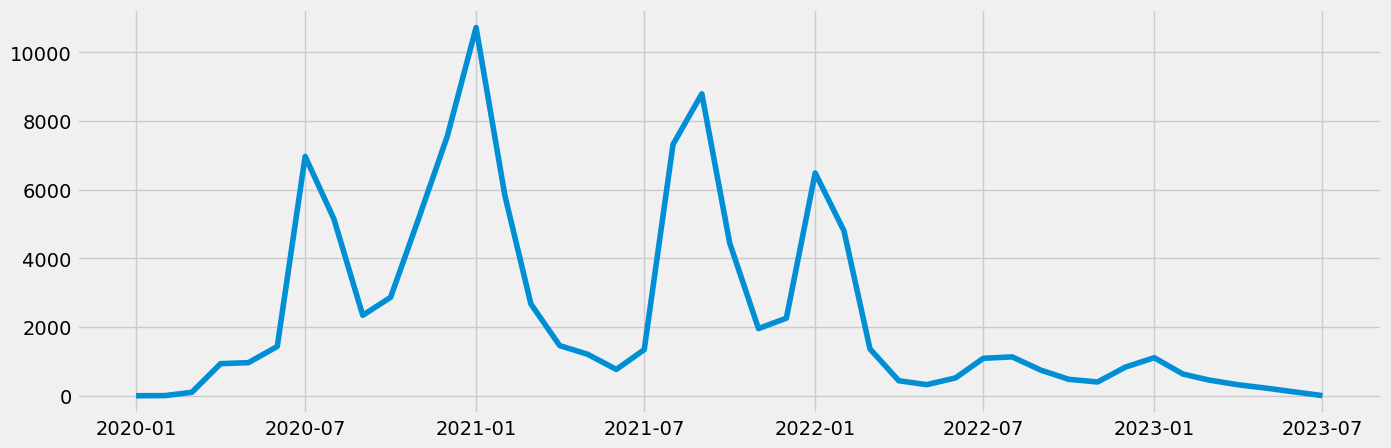

In [107]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_texas_covid)
folder_path_3 = '/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project/04 Analysis/Visualizations'
output_file_path_7 = os.path.join(folder_path_3, 'texas_covid_plot.png')
plt.savefig(output_file_path_7)

In [61]:
# Check for missing values
df_texas_covid.isnull().sum() 

COVID-19 Deaths    0
dtype: int64

In [62]:
# Check for duplicates
dups = df_texas_covid.duplicated()
dups.sum()

1

In [63]:
# show duplicate value
print(df_texas_covid[dups])

            COVID-19 Deaths
datetime                   
2023-07-01                4


In [64]:
df_texas_covid.tail(15)

,COVID-19 Deaths
datetime,
2022-05-01,323
2022-06-01,518
2022-07-01,1090
2022-08-01,1132
2022-09-01,745
2022-10-01,477
2022-11-01,401
2022-12-01,835
2023-01-01,1107


### This is not an actual duplicate value, it is possible to have the same number of COVID-19 deaths across different months. Therefore I will leave this "duplicate" in the dataset.

## California

In [109]:
# Set the "Month + Year" column as the index

from datetime import datetime
# Create a datetime column from "Month + Year"
df_cali_covid['datetime'] = pd.to_datetime(df_cali_covid['Month + Year']) 
# Set the datetime as the index of the dataframe.
df_cali_covid = df_cali_covid.set_index('datetime') 
# Drop the "Month + Year" column.
df_cali_covid.drop(['Month + Year'], axis=1, inplace=True) 
# check output of new data set
df_cali_covid.head()

KeyError: 'Month + Year'

In [ ]:
folder_path = '/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project/02 Data/Prepared Data'
output_file_path_2 = os.path.join(folder_path, 'Cali_line_graph.csv')
df_cali_covid.to_csv(output_file_path_2, index=False)

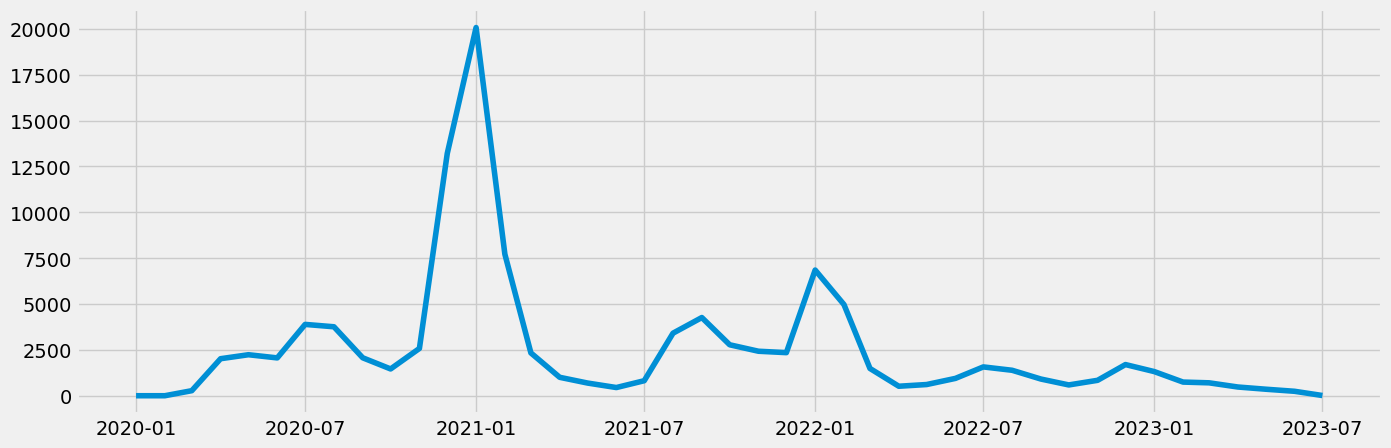

In [110]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_cali_covid)
folder_path_3 = '/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project/04 Analysis/Visualizations'
output_file_path_8 = os.path.join(folder_path_3, 'cali_covid_plot.png')
plt.savefig(output_file_path_8)

In [68]:
# Check for missing values
df_cali_covid.isnull().sum() 

COVID-19 Deaths    0
dtype: int64

In [69]:
# Check for duplicates
dups_2 = df_cali_covid.duplicated()
dups_2.sum()

1

In [70]:
# show duplicate value
print(df_cali_covid[dups_2])

            COVID-19 Deaths
datetime                   
2020-02-01                4


In [71]:
df_cali_covid.head(10)

,COVID-19 Deaths
datetime,
2020-01-01,4
2020-02-01,4
2020-03-01,279
2020-04-01,2021
2020-05-01,2238
2020-06-01,2065
2020-07-01,3890
2020-08-01,3761
2020-09-01,2071


### This is not an actual duplicate value, it is possible to have the same number of COVID-19 deaths across different months. Therefore I will leave this "duplicate" in the dataset.

## Florida

In [72]:
# Set the "Month + Year" column as the index

from datetime import datetime
# Create a datetime column from "Month + Year"
df_florida_covid['datetime'] = pd.to_datetime(df_florida_covid['Month + Year']) 
# Set the datetime as the index of the dataframe.
df_florida_covid = df_florida_covid.set_index('datetime') 
# Drop the "Month + Year" column.
df_florida_covid.drop(['Month + Year'], axis=1, inplace=True) 
# check output of new data set
df_florida_covid.head()

,COVID-19 Deaths
datetime,
2020-01-01,0
2020-02-01,0
2020-03-01,191
2020-04-01,1311
2020-05-01,1131


In [73]:
folder_path = '/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project/02 Data/Prepared Data'
output_file_path_3 = os.path.join(folder_path, 'florida_line_graph.csv')
df_florida_covid.to_csv(output_file_path_3, index=False)

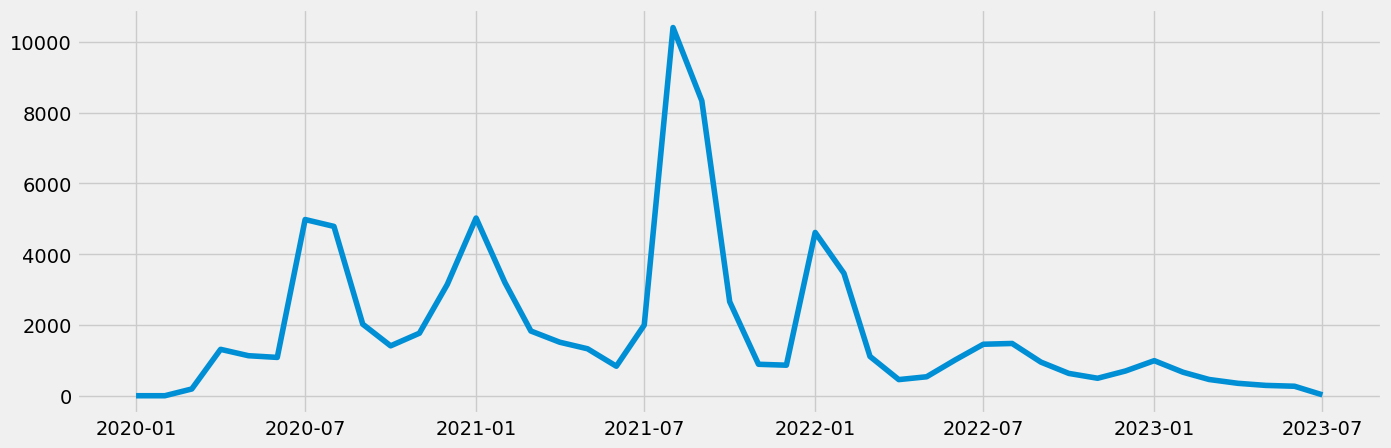

In [111]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_florida_covid)
folder_path_3 = '/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project/04 Analysis/Visualizations'
output_file_path_8 = os.path.join(folder_path_3, 'florida_covid_plot.png')
plt.savefig(output_file_path_8)

In [75]:
# Check for missing values
df_florida_covid.isnull().sum()

COVID-19 Deaths    0
dtype: int64

In [76]:
# Check for duplicates
dups_3 = df_florida_covid.duplicated()
dups_3.sum()

1

In [77]:
# show duplicate value
print(df_florida_covid[dups_3])

            COVID-19 Deaths
datetime                   
2020-02-01                0


In [78]:
df_florida_covid.head(10)

,COVID-19 Deaths
datetime,
2020-01-01,0
2020-02-01,0
2020-03-01,191
2020-04-01,1311
2020-05-01,1131
2020-06-01,1083
2020-07-01,4980
2020-08-01,4786
2020-09-01,2023


### This is not an actual duplicate value, it is possible to have the same number of COVID-19 deaths across different months. Therefore I will leave this "duplicate" in the dataset.

## New York

In [79]:
# Set the "Month + Year" column as the index

from datetime import datetime
# Create a datetime column from "Month + Year"
df_NY_covid['datetime'] = pd.to_datetime(df_NY_covid['Month + Year']) 
# Set the datetime as the index of the dataframe.
df_NY_covid = df_NY_covid.set_index('datetime') 
# Drop the "Month + Year" column.
df_NY_covid.drop(['Month + Year'], axis=1, inplace=True) 
# check output of new data set
df_NY_covid.head()

,COVID-19 Deaths
datetime,
2020-01-01,4
2020-02-01,4
2020-03-01,2887
2020-04-01,22214
2020-05-01,5573


In [80]:
folder_path = '/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project/02 Data/Prepared Data'
output_file_path_4 = os.path.join(folder_path, 'NY_line_graph.csv')
df_NY_covid.to_csv(output_file_path_4, index=False)

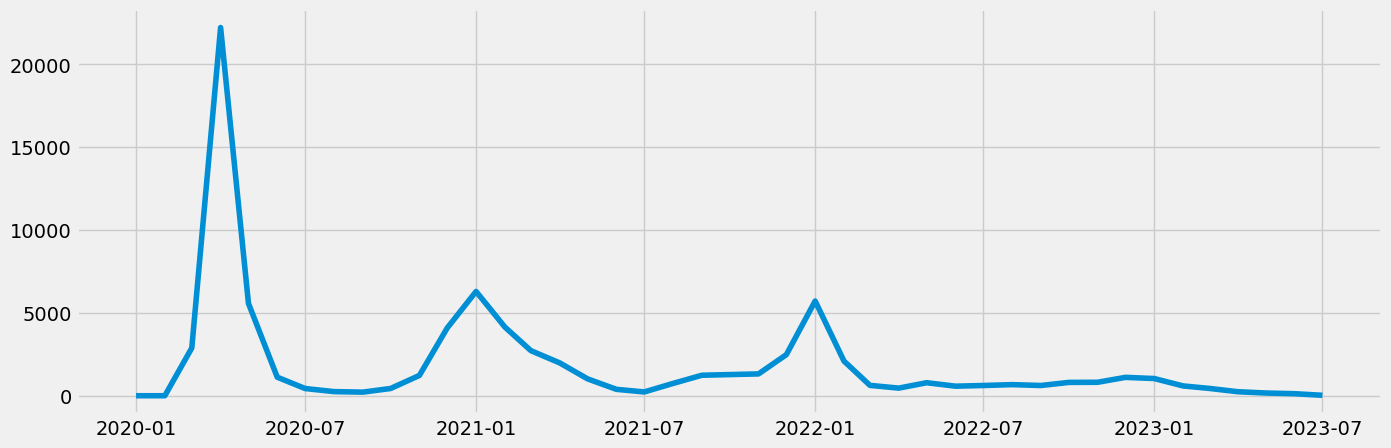

In [112]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_NY_covid)
folder_path_3 = '/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project/04 Analysis/Visualizations'
output_file_path_9 = os.path.join(folder_path_3, 'ny_covid_plot.png')
plt.savefig(output_file_path_9)

In [82]:
# Check for missing values
df_NY_covid.isnull().sum()

COVID-19 Deaths    0
dtype: int64

In [83]:
# Check for duplicates
dups_4 = df_NY_covid.duplicated()
dups_4.sum()

2

In [84]:
# show duplicate values
print(df_NY_covid[dups_4])

            COVID-19 Deaths
datetime                   
2020-02-01                4
2022-09-01              621


In [85]:
df_NY_covid.head(5)

,COVID-19 Deaths
datetime,
2020-01-01,4
2020-02-01,4
2020-03-01,2887
2020-04-01,22214
2020-05-01,5573


In [86]:
df_NY_covid.tail(15)

,COVID-19 Deaths
datetime,
2022-05-01,789
2022-06-01,580
2022-07-01,621
2022-08-01,673
2022-09-01,621
2022-10-01,808
2022-11-01,815
2022-12-01,1112
2023-01-01,1041


### This is not an actual duplicate value, it is possible to have the same number of COVID-19 deaths across different months. Therefore I will leave this "duplicate" in the dataset.

## All US States

In [87]:
# Set the "Month + Year" column as the index

from datetime import datetime
# Create a datetime column from "Month + Year"
df_combined['datetime'] = pd.to_datetime(df_combined['Month + Year']) 
# Set the datetime as the index of the dataframe.
df_combined = df_combined.set_index('datetime') 
# Drop the "Month + Year" column.
df_combined.drop(['Month + Year'], axis=1, inplace=True) 
# check output of new data set
df_combined.head()

,COVID-19 Deaths
datetime,
2020-01-01,24
2020-02-01,44
2020-03-01,7183
2020-04-01,65625
2020-05-01,38365


In [90]:
folder_path = '/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project/02 Data/Prepared Data'
output_file_path = os.path.join(folder_path, 'allUSstates_line_graph.csv')
df_combined.to_csv(output_file_path, index=False)

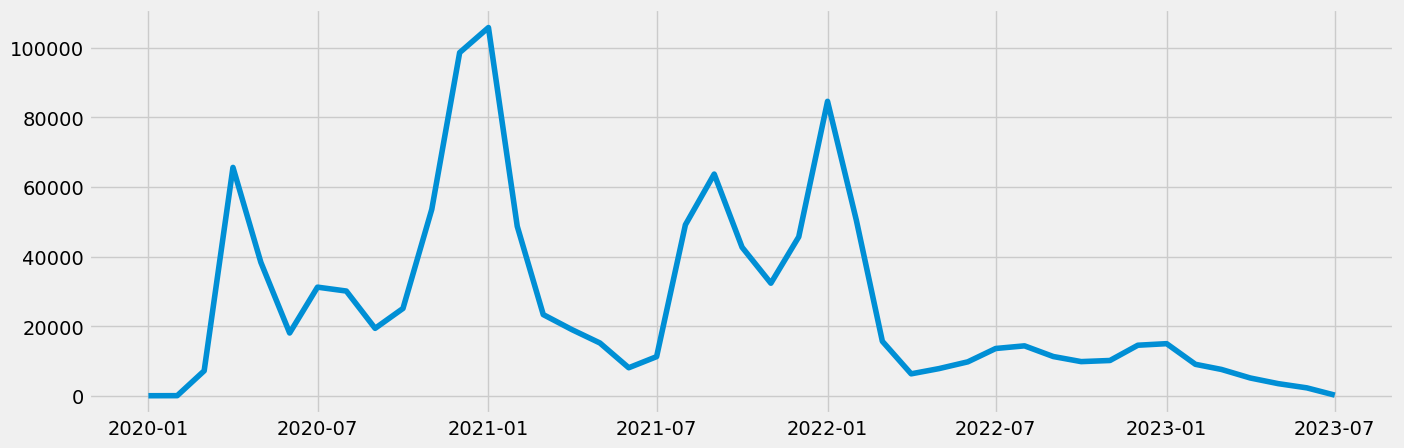

In [91]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_combined)

In [93]:
# Check for missing values
df_combined.isnull().sum()

COVID-19 Deaths    0
dtype: int64

In [94]:
# Check for duplicates
dups_5 = df_combined.duplicated()
dups_5.sum()

0

# 04. Time-series analysis: decomposition

## Texas

In [95]:
# Decompose the time series using an additive model
decomposition_tx = sm.tsa.seasonal_decompose(df_texas_covid, model='additive')

In [96]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

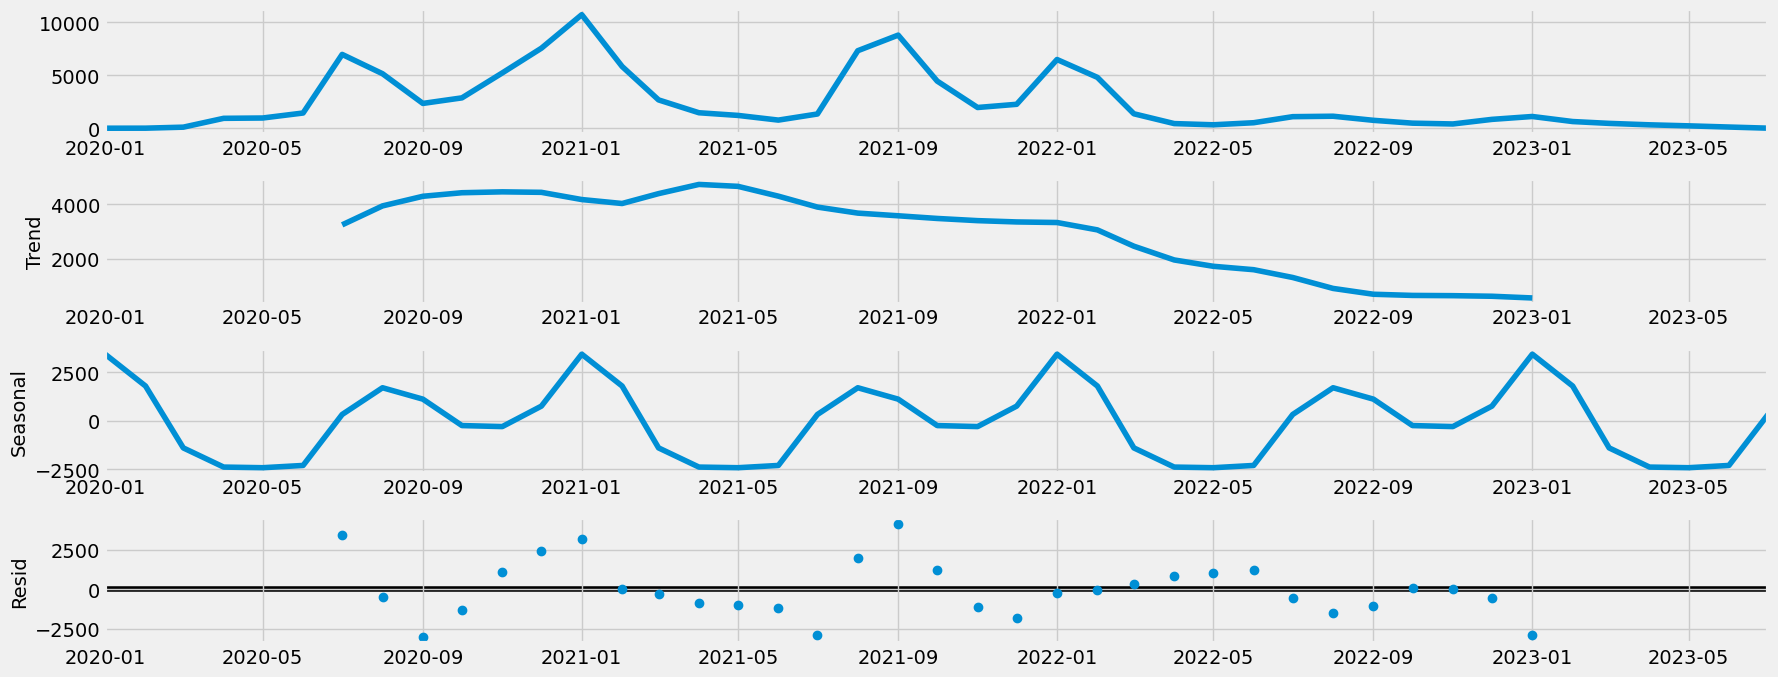

In [97]:
# Plot the separate components
decomposition_tx.plot()
plt.show()

### The overall trend is that COVID-19 deaths are decreasing over time in Texas. Seasonally, COVID-19 deaths increase starting in June and peak in January. There is a mild dip in COVID-19 deaths from August to November. The least COVID-19 deaths seasonally occur during April and May. According to the residual graph, there is more noise in the data during 2020 and 2021, likely because these were the first 2 years of the pandemic before we were more certain of how to treat and prevent COVID-19.

## California

In [98]:
# Decompose the time series using an additive model
decomposition_ca = sm.tsa.seasonal_decompose(df_cali_covid, model='additive')

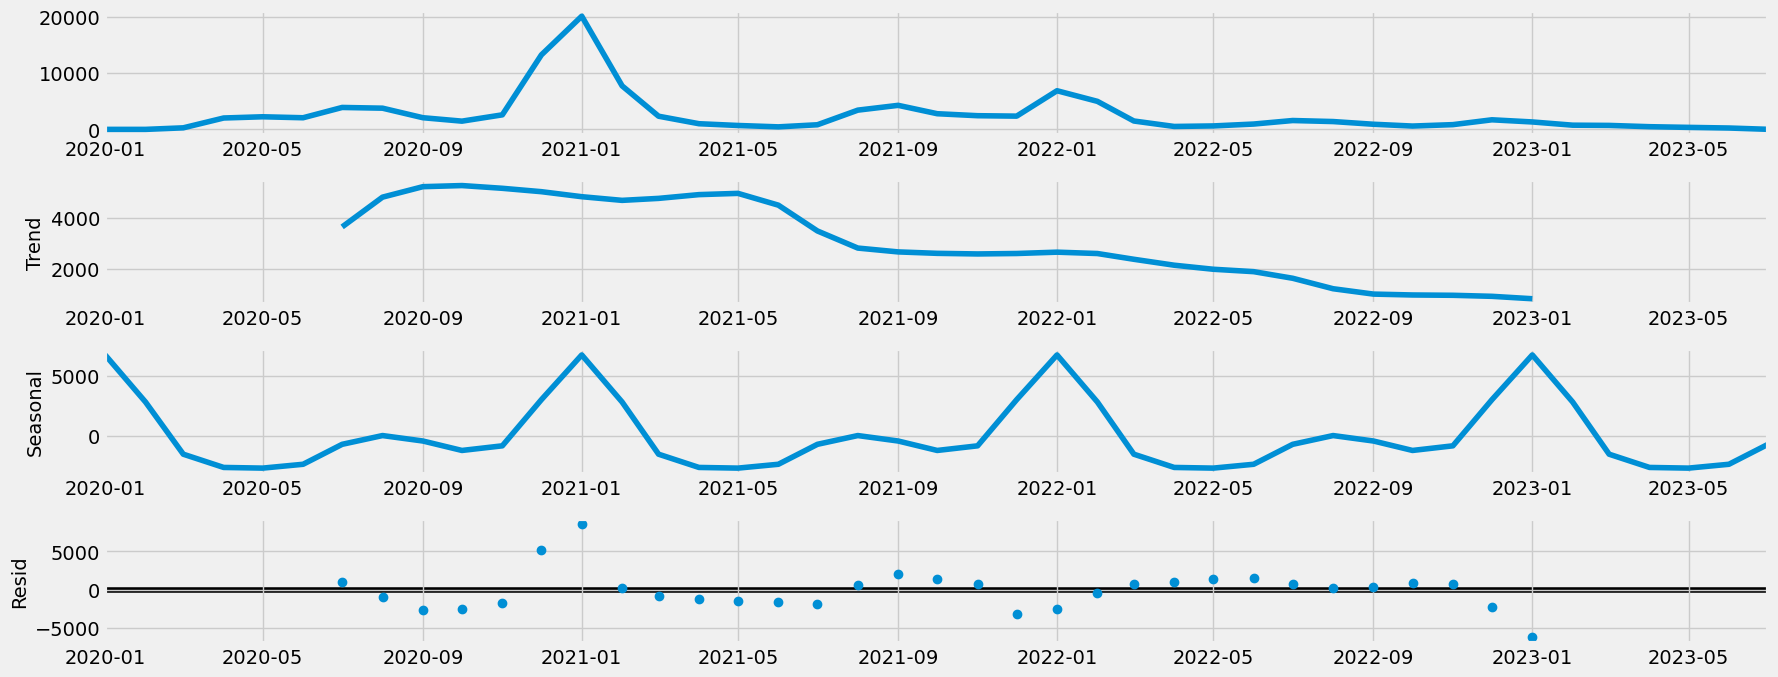

In [99]:
# Plot the separate components
decomposition_ca.plot()
plt.show()

### The overall trend is that COVID-19 deaths are decreasing over time in California. Seasonally, COVID-19 deaths increase starting in June and peak in January. There is a mild dip in COVID-19 deaths from August to October. The least COVID-19 deaths seasonally occur during April and May. According to the residual graph, there is more noise in the data during 2020, likely because this was the first year of the pandemic before we were more certain of how to treat and prevent COVID-19.

## Florida

In [100]:
# Decompose the time series using an additive model
decomposition_fl = sm.tsa.seasonal_decompose(df_florida_covid, model='additive')

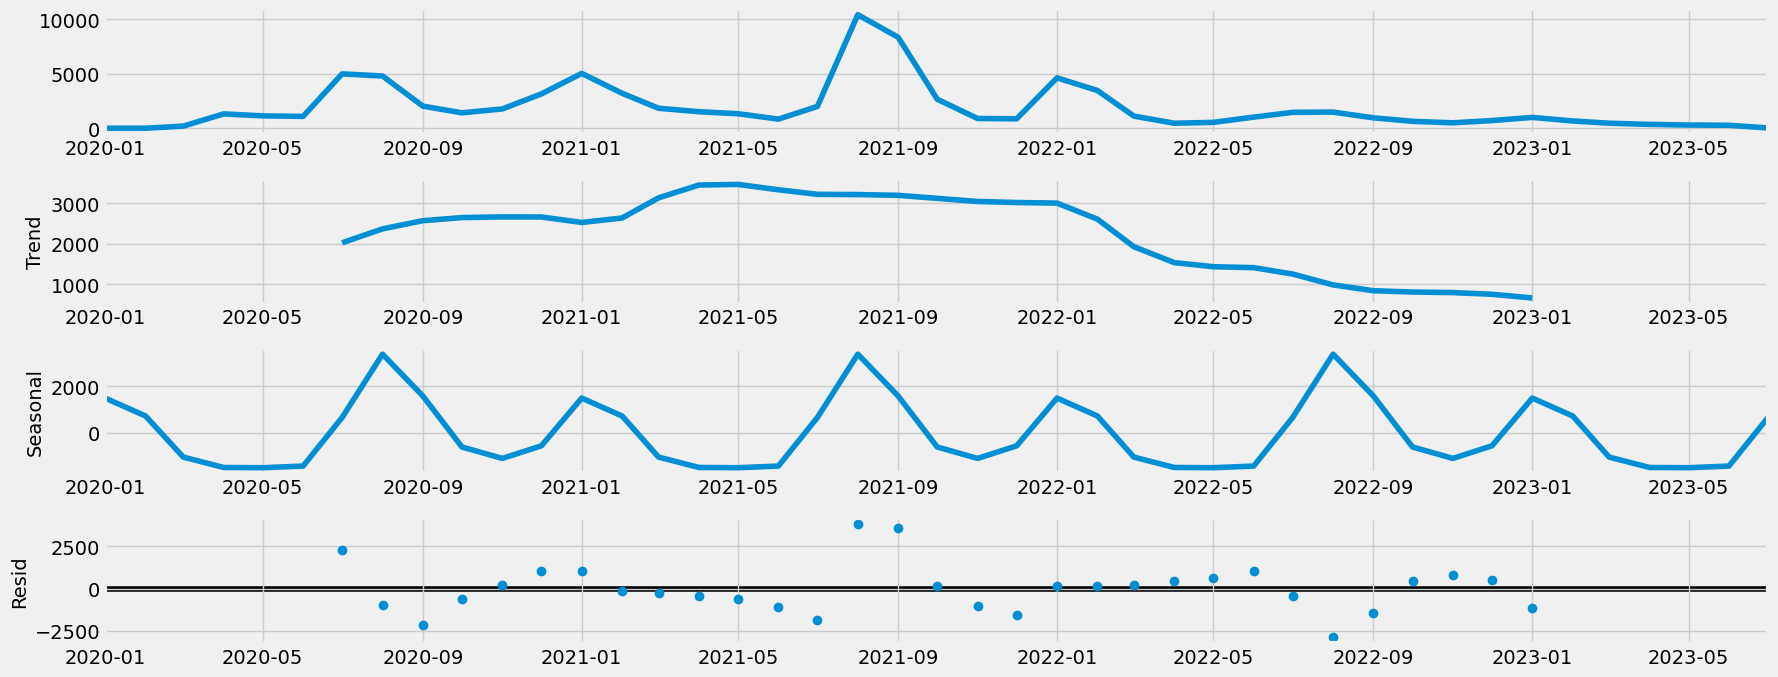

In [101]:
# Plot the separate components
decomposition_fl.plot()
plt.show()

### For the overall trend, Florida saw lower COVID-19 deaths at first until March 2021 when COVID-19 deaths overall increased for a bit. Since 2021 though COVID-19 deaths overall decreased in Florida. Seasonally, COVID-19 has 2 peaks in January and August. The least COVID-19 deaths seasonally occur during April and May. According to the residual graph, there is more noise in the data during 2021 and there is also some noise in 2020 and 2022. Florida is odd in this way compared to the other states.

## New York

In [102]:
# Decompose the time series using an additive model
decomposition_ny = sm.tsa.seasonal_decompose(df_NY_covid, model='additive')

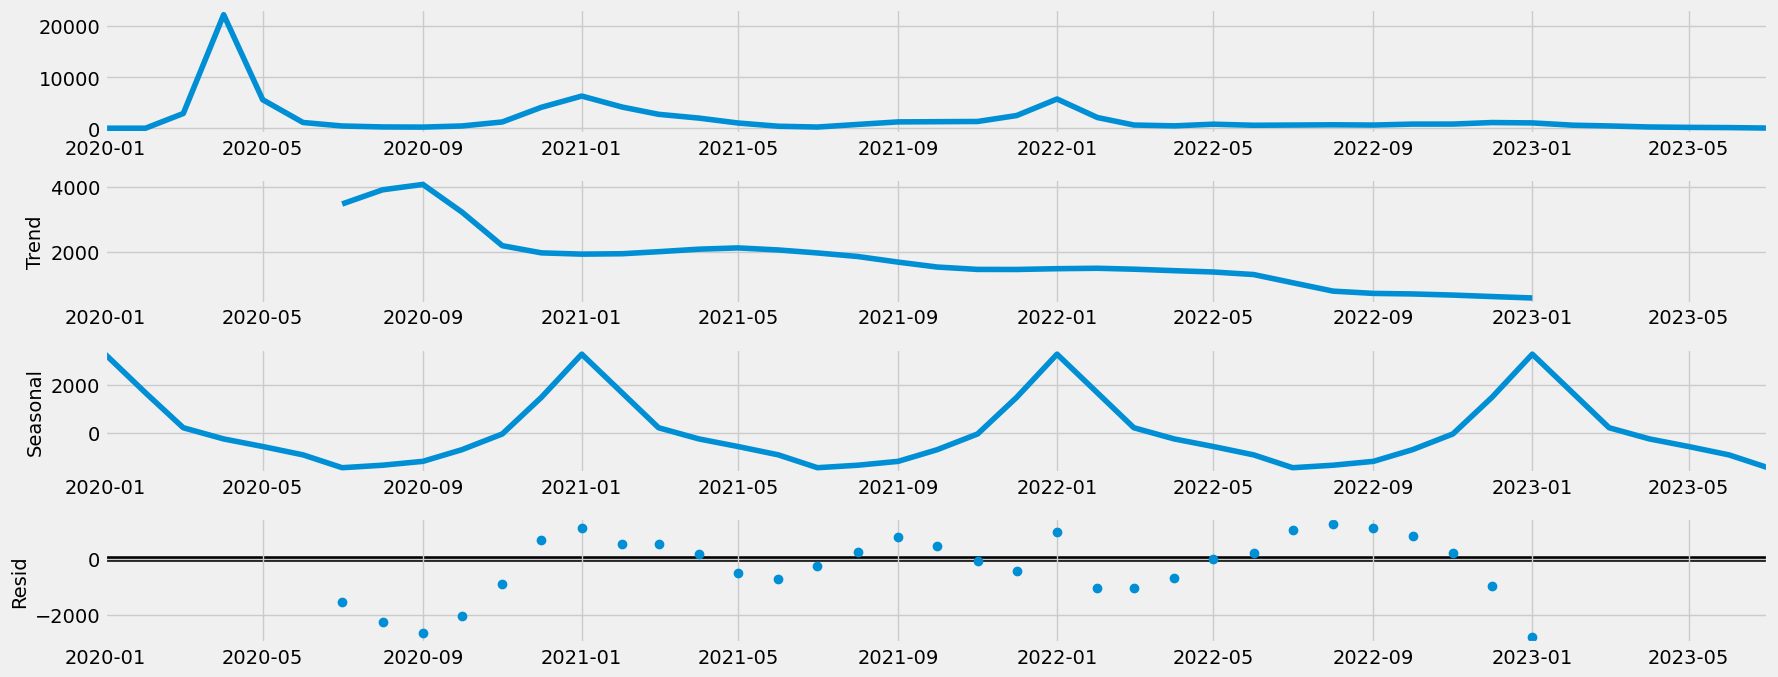

In [103]:
# Plot the separate components
decomposition_ny.plot()
plt.show()

### The overall trend is that COVID-19 deaths are decreasing over time in New York. Seasonally, COVID-19 deaths increase starting in July and peak in January. The least COVID-19 deaths seasonally occur during July. According to the residual graph, there is more noise in the data during 2020, likely because this was the first year of the pandemic before we were more certain of how to treat and prevent COVID-19.

## All US States

In [104]:
# Decompose the time series using an additive model
decomposition_all = sm.tsa.seasonal_decompose(df_combined, model='additive')

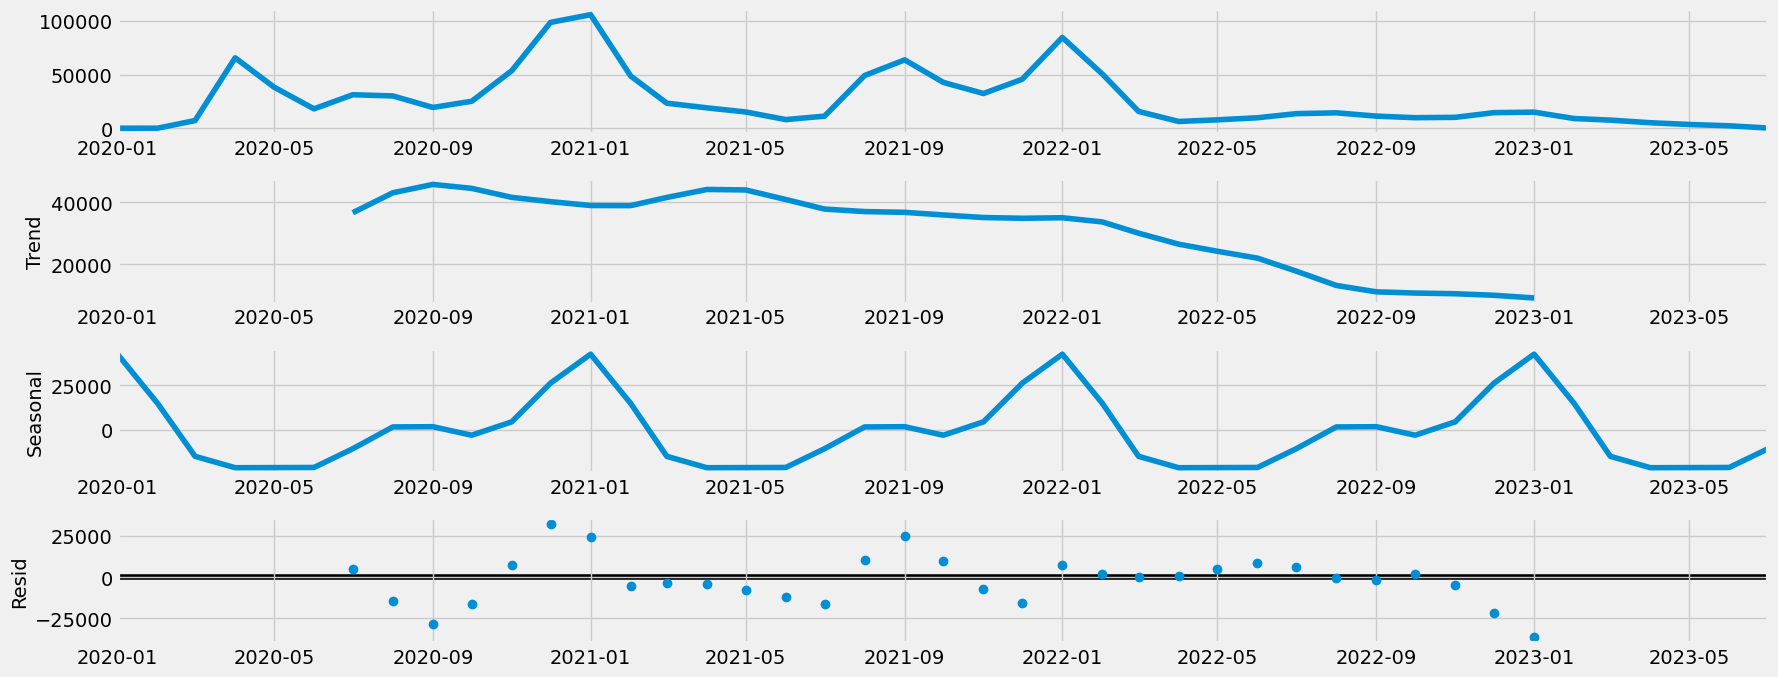

In [105]:
# Plot the separate components
decomposition_all.plot()
folder_path_2 = '/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project/04 Analysis/Visualizations'
output_file_path_5 = os.path.join(folder_path_2, 'decomposition_plot.png')
plt.savefig(output_file_path_5)
plt.show()

### The overall trend is that COVID-19 deaths are decreasing over time in the US. Seasonally, COVID-19 deaths increase starting in June and peak in January. There is a mild dip in COVID-19 deaths from September to October. The least COVID-19 deaths seasonally occur during April and May. According to the residual graph, there is more noise in the data during 2020 and 2021, likely because these were the first years of the pandemic before we were more certain of how to treat and prevent COVID-19.

# 05. Testing for stationarity

## Texas

In [436]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_texas_covid['COVID-19 Deaths'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.349443
p-value                         0.156517
Number of Lags Used             2.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


### The null hypothesis cannot be rejected because the test statistic is greater than all critical values. Therefore this data is non-stationary.

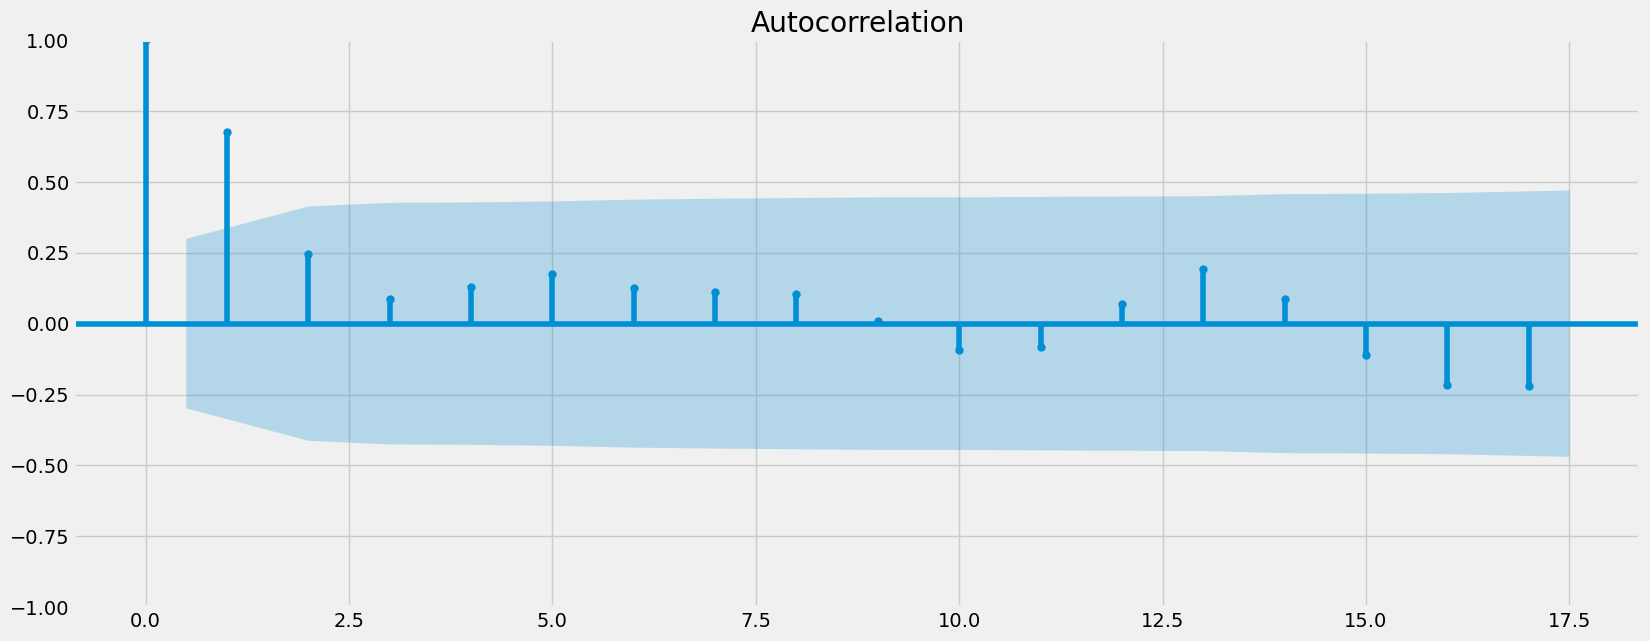

In [437]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_texas_covid)
plt.show()

## California

In [446]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_cali_covid['COVID-19 Deaths'])

Dickey-Fuller Stationarity test:
Test Statistic                 -4.343064
p-value                         0.000374
Number of Lags Used             1.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


### We can reject the null hypothesis because the test statistic value is smaller than all of the critical values. Our p-value is also ideally p<0.05. This means our series is stationary and does not need differencing.

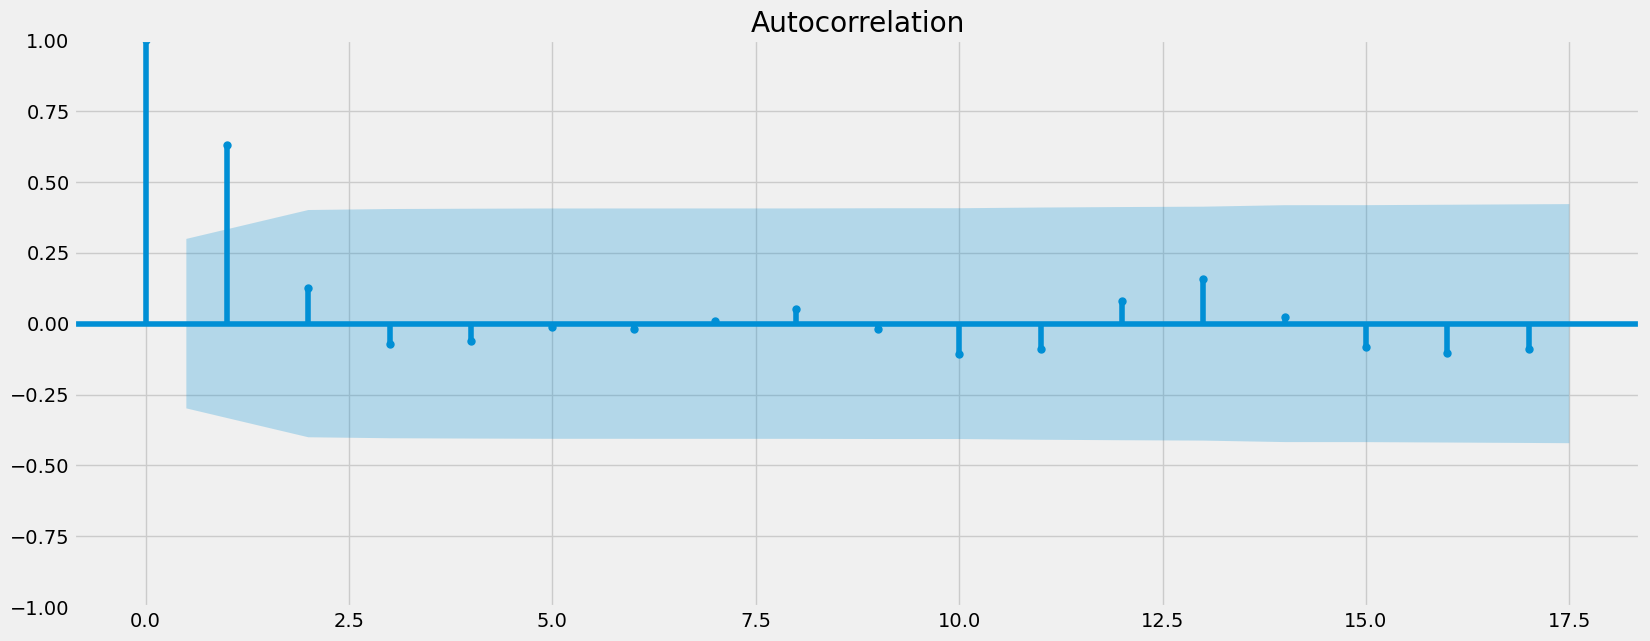

In [447]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_cali_covid)
plt.show()

## Florida

In [448]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_florida_covid['COVID-19 Deaths'])

Dickey-Fuller Stationarity test:
Test Statistic                 -4.546761
p-value                         0.000162
Number of Lags Used             1.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


### We can reject the null hypothesis because the test statistic value is smaller than all of the critical values. Our p-value is also ideally p<0.05. This means our series is stationary and does not need differencing.

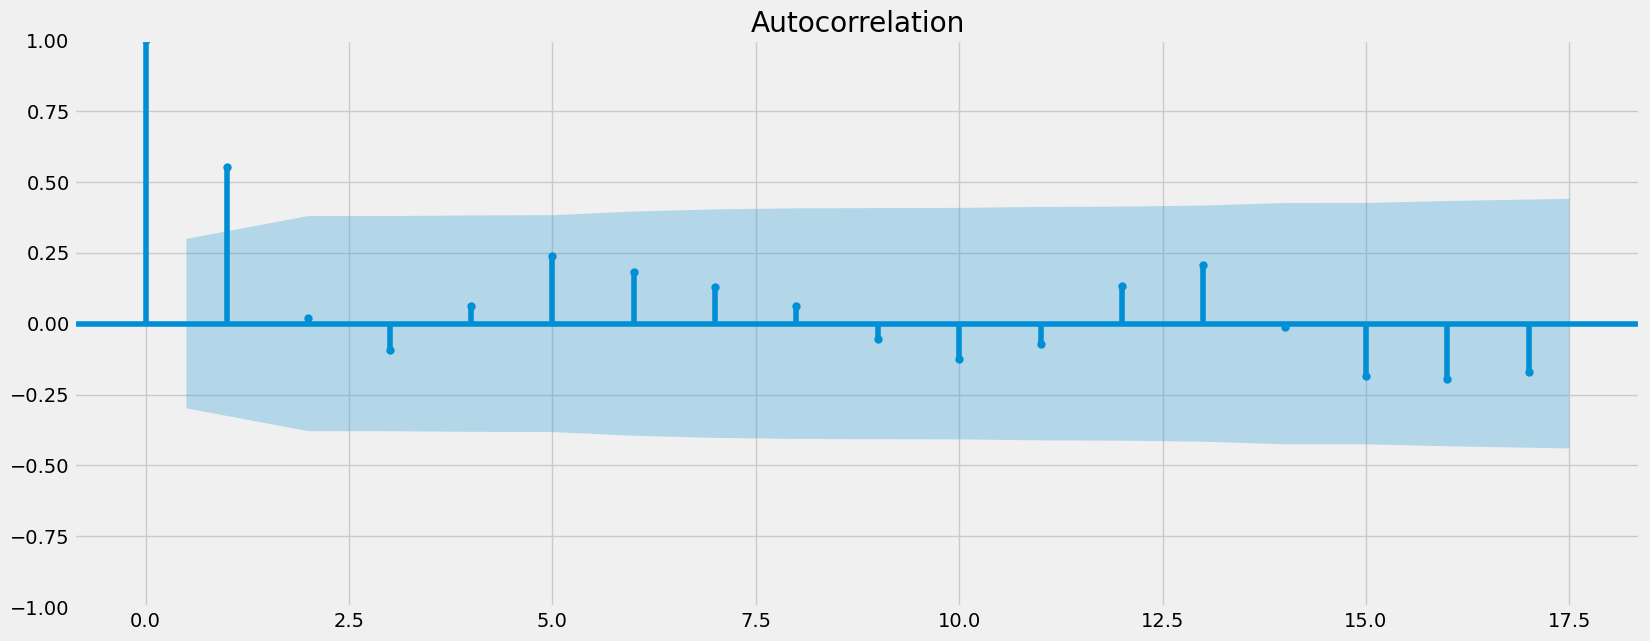

In [450]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_florida_covid)
plt.show()

## New York

In [449]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_NY_covid['COVID-19 Deaths'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.027653
p-value                         0.743045
Number of Lags Used             8.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


### The null hypothesis cannot be rejected because the test statistic is greater than all critical values. Therefore this data is non-stationary.

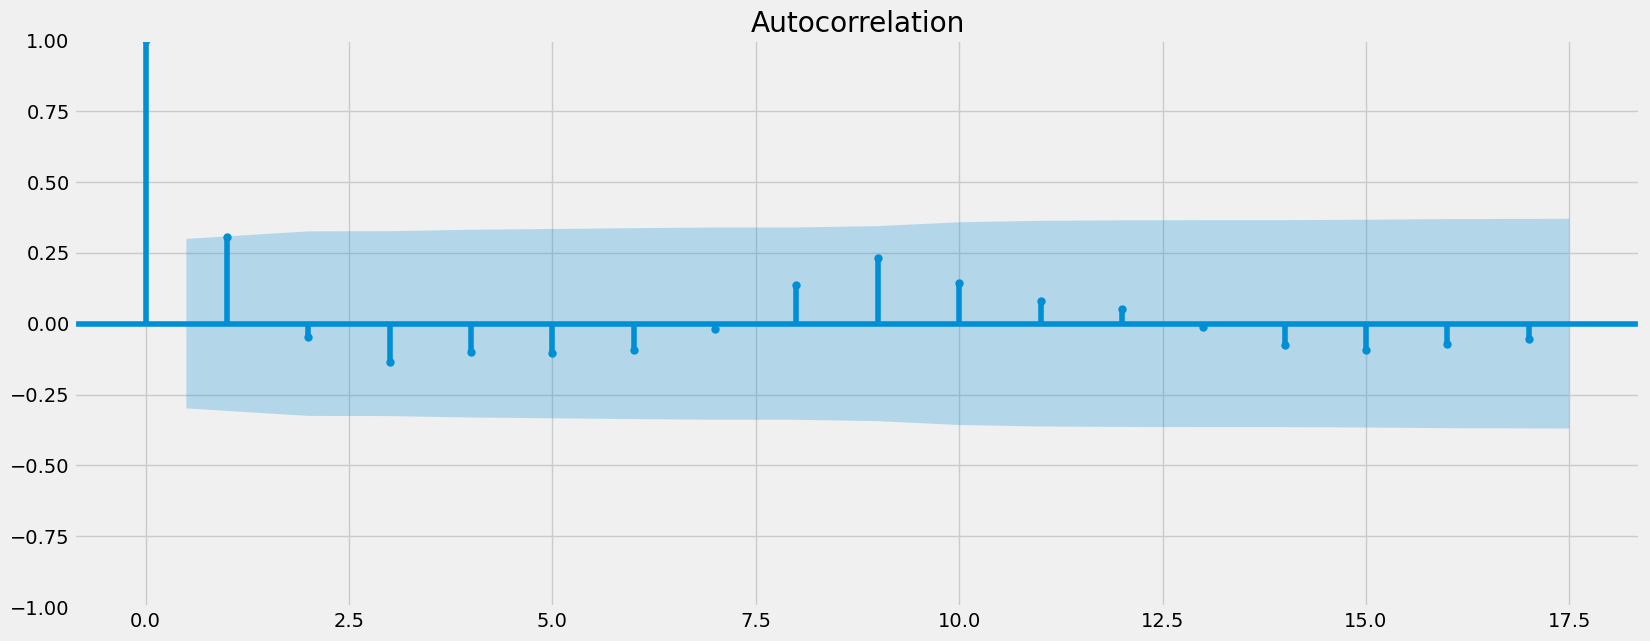

In [451]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_NY_covid)
plt.show()

## All US States

In [458]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_combined['COVID-19 Deaths'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.466063
p-value                         0.123951
Number of Lags Used             2.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


### The null hypothesis cannot be rejected because the test statistic is greater than all critical values. Therefore this data is non-stationary.

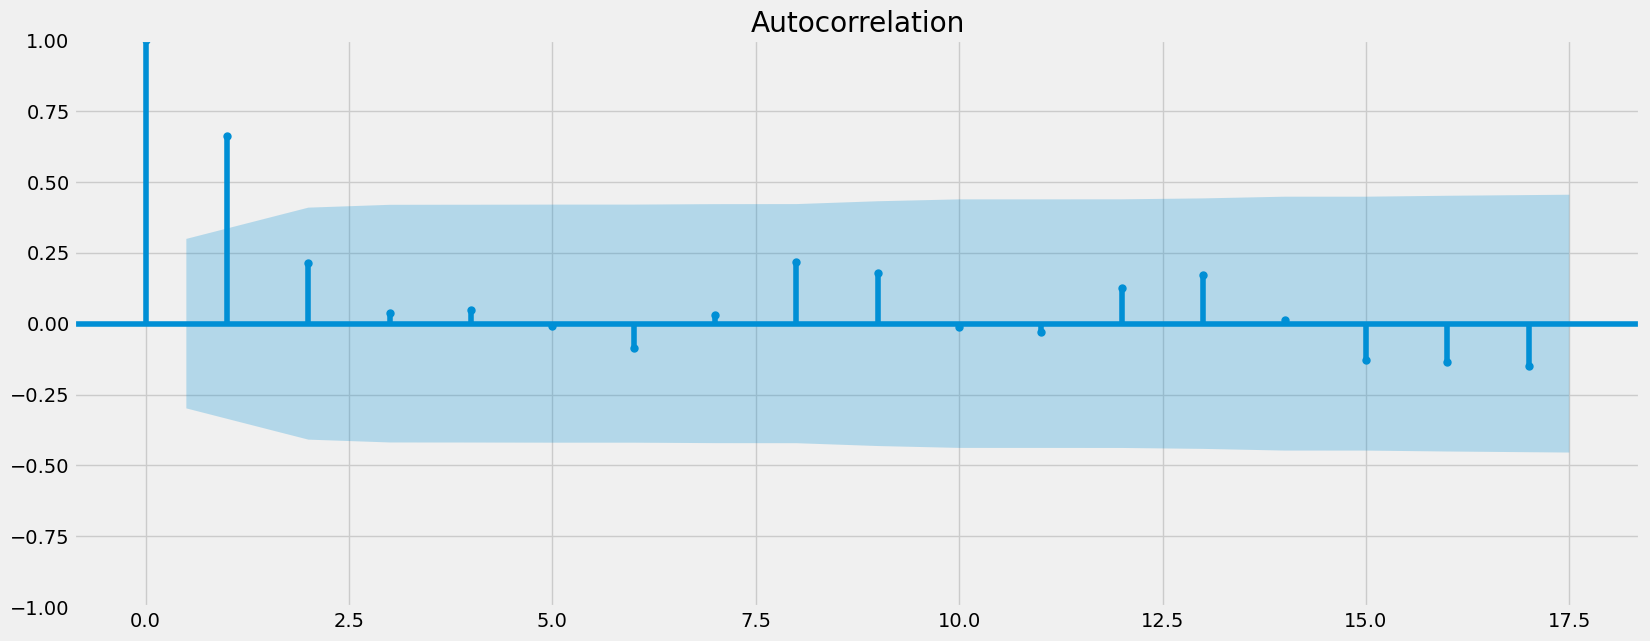

In [459]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_combined)
plt.show()

# 06. Stationarizing Data

## Texas

In [438]:
data_diff = df_texas_covid - df_texas_covid.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [439]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [440]:
data_diff.head()

,COVID-19 Deaths
datetime,
2020-02-01,4.0
2020-03-01,95.0
2020-04-01,835.0
2020-05-01,30.0
2020-06-01,472.0


In [441]:
data_diff.columns

Index(['COVID-19 Deaths'], dtype='object')

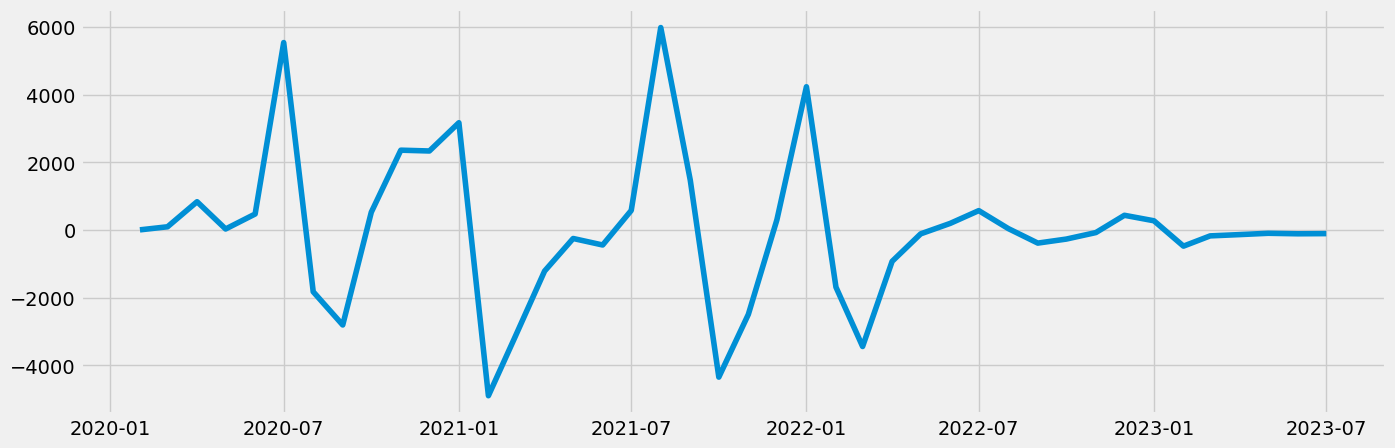

In [442]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [443]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.596417e+00
p-value                        6.907407e-09
Number of Lags Used            1.000000e+00
Number of Observations Used    4.000000e+01
Critical Value (1%)           -3.605565e+00
Critical Value (5%)           -2.937069e+00
Critical Value (10%)          -2.606986e+00
dtype: float64


### The null hypothesis can be rejected because the test statistic is smaller than all critical values. Our p-value is also p<0.05 which is what we want. Now this series is stationary and the data can be used for forecasting.

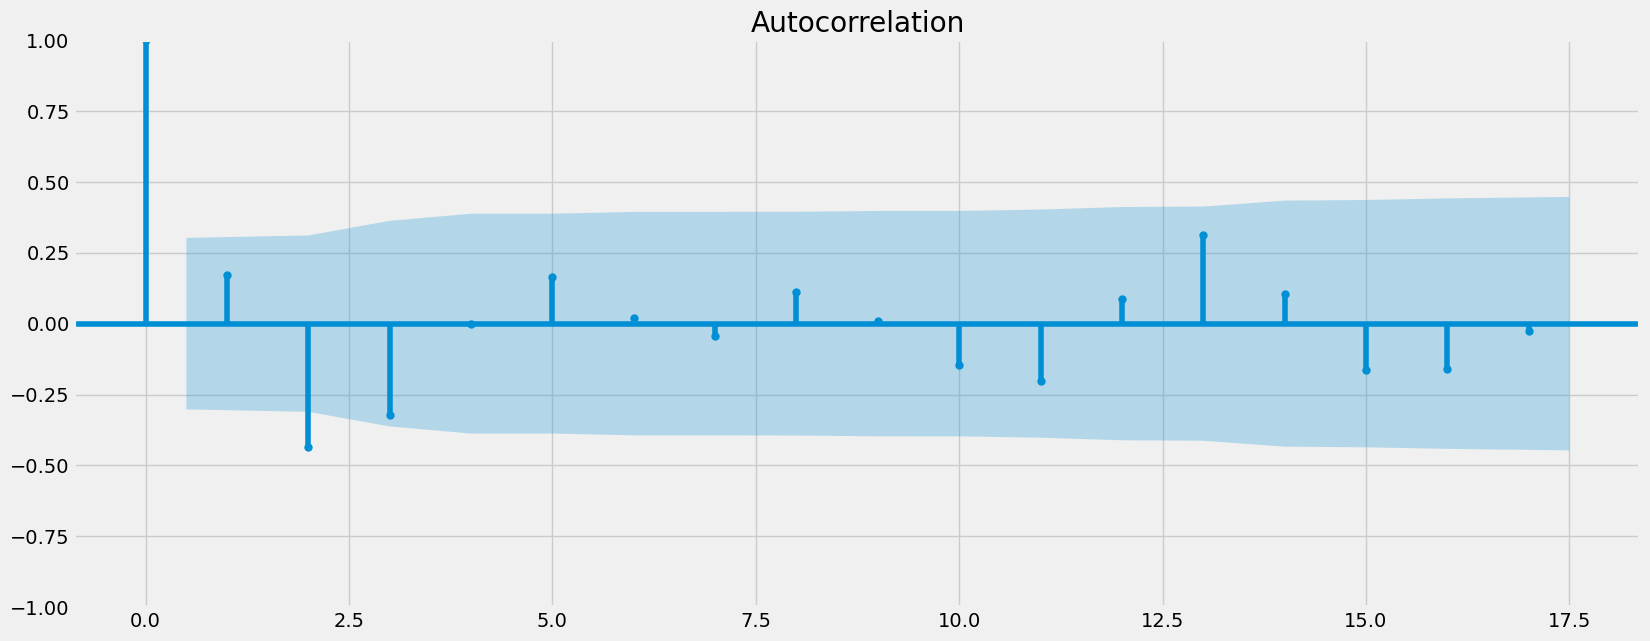

In [444]:
plot_acf(data_diff)
plt.show()

## California

### We do not need to stationarize our California data.

## Florida

### We do not need to stationarize our California data.

## New York

In [452]:
data_diff_2 = df_NY_covid - df_NY_covid.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [453]:
data_diff_2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [454]:
data_diff_2.head()

,COVID-19 Deaths
datetime,
2020-02-01,0.0
2020-03-01,2883.0
2020-04-01,19327.0
2020-05-01,-16641.0
2020-06-01,-4452.0


In [455]:
data_diff_2.columns

Index(['COVID-19 Deaths'], dtype='object')

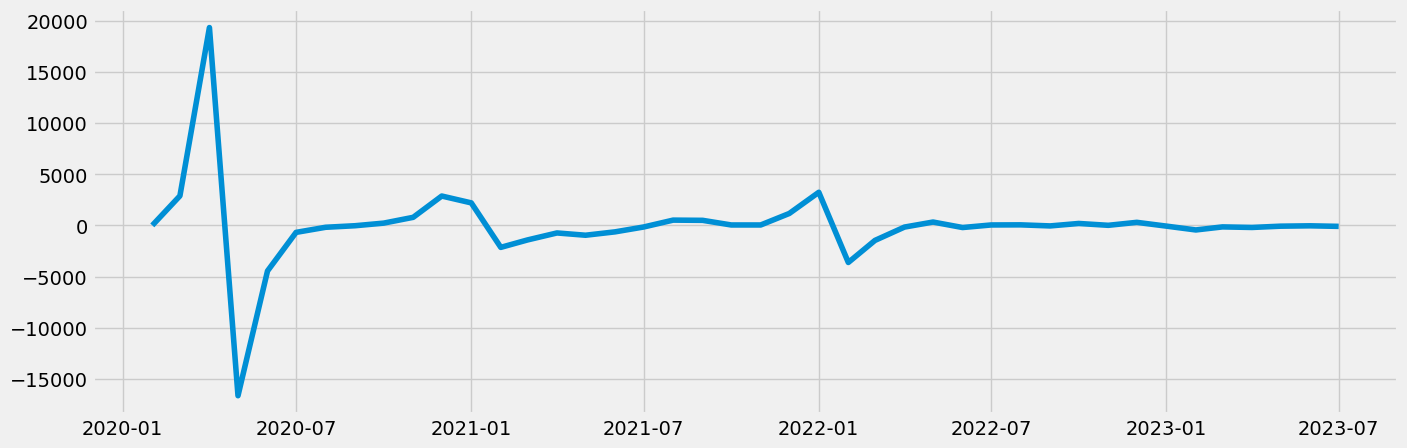

In [456]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [457]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -6.284403e+00
p-value                        3.728504e-08
Number of Lags Used            7.000000e+00
Number of Observations Used    3.400000e+01
Critical Value (1%)           -3.639224e+00
Critical Value (5%)           -2.951230e+00
Critical Value (10%)          -2.614447e+00
dtype: float64


### The null hypothesis can be rejected because the test statistic is smaller than all critical values. Our p-value is also p<0.05 which is what we want. Now this series is stationary and the data can be used for forecasting.

## All US States

In [460]:
data_diff_3 = df_combined - df_combined.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [461]:
data_diff_3.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [462]:
data_diff_3.head()

,COVID-19 Deaths
datetime,
2020-02-01,20.0
2020-03-01,7139.0
2020-04-01,58442.0
2020-05-01,-27260.0
2020-06-01,-20317.0


In [463]:
data_diff_3.columns

Index(['COVID-19 Deaths'], dtype='object')

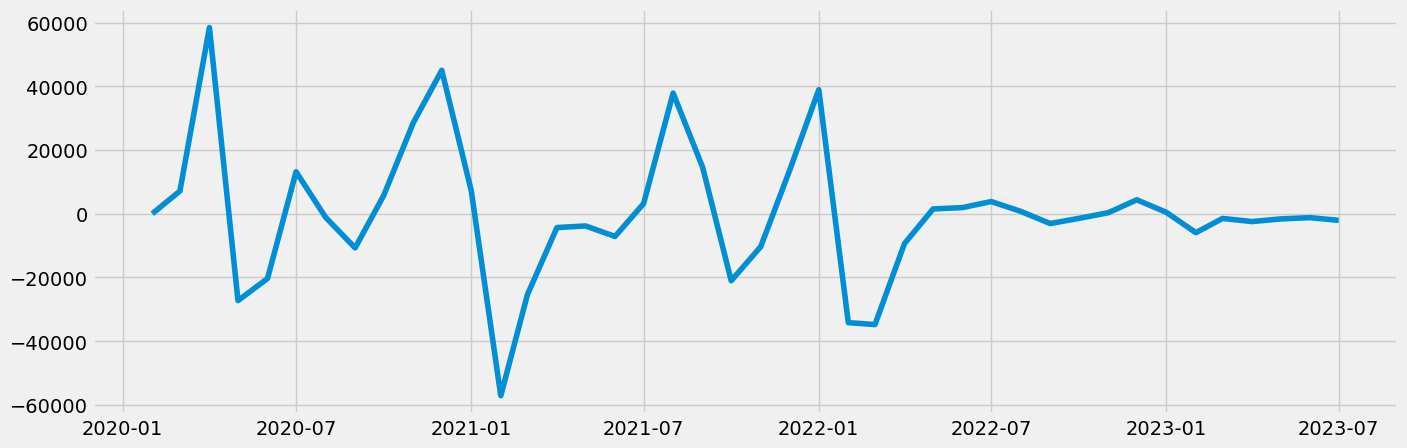

In [464]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_3)

In [465]:
dickey_fuller(data_diff_3)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.626156
p-value                         0.005280
Number of Lags Used             9.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


### Now our test statistic is larger than the 1% critical value and smaller than the 5% and 10% critical values. The p-value is p<0.05 which is what we want. With a significance level of 5% we can reject our null hypothesis and this series is stationary.